In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12 
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("C:/Users/ugurs/Desktop/Migros/satisDeneme2.csv", sep = ';')

In [4]:
df.head()

,Tarih,SatisMiktar
0,12-09-2016,48120
1,12-10-2016,67418
2,12-11-2016,96344
3,12-12-2016,75159
4,12-13-2016,55833


In [3]:
df['Tarih'].max(), df['Tarih'].min()

('12-31-2016', '10-10-2016')

In [4]:
df['SatisMiktar'].max(),df['SatisMiktar'].min()

(123750, 2463)

In [5]:
df.isnull().sum()

Tarih          0
SatisMiktar    0
dtype: int64

In [6]:
df['Tarih'] = pd.to_datetime(df['Tarih'])

In [7]:
df = df.groupby('Tarih')['SatisMiktar'].sum().reset_index()

In [8]:
df = df.set_index('Tarih')
df.index

DatetimeIndex(['2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13',
               '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17',
               '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21',
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02',
               '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06',
               '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
               '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
               '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
               '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22',
               '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
               '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
               '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
      

In [9]:
y = df['SatisMiktar'].resample('D').sum()

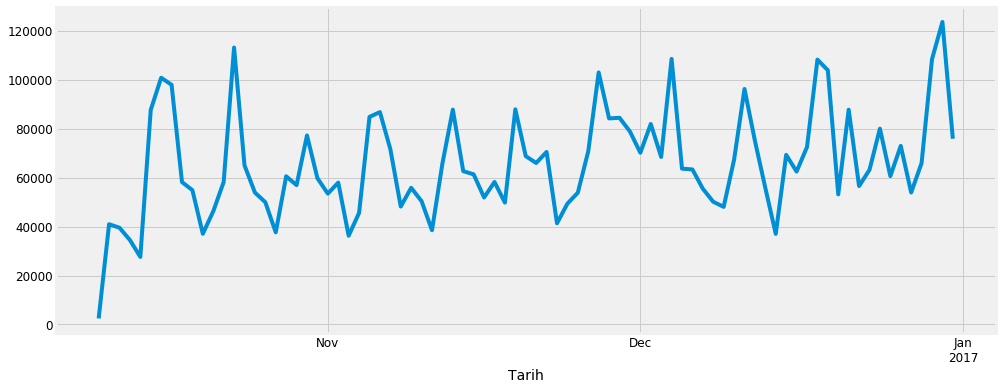

In [11]:
y.plot(figsize=(15, 6))
plt.show()

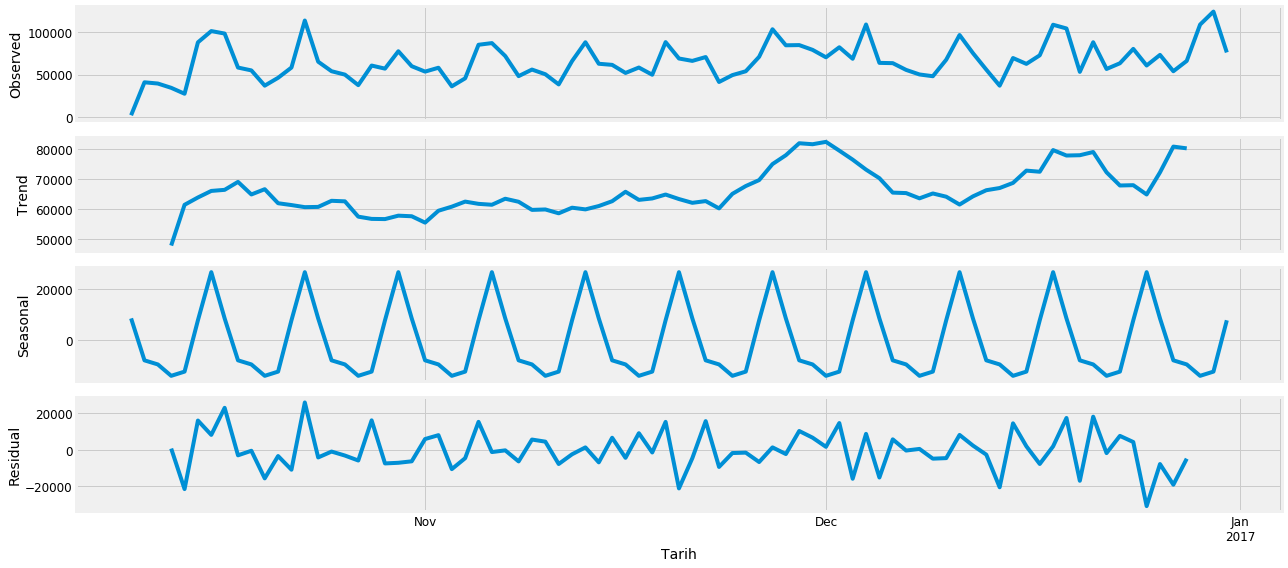

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 11) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 11)
SARIMAX: (0, 0, 1) x (0, 1, 0, 11)
SARIMAX: (0, 1, 0) x (0, 1, 1, 11)
SARIMAX: (0, 1, 0) x (1, 0, 0, 11)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}11 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 11)11 - AIC:2063.32768497
ARIMA(0, 0, 0)x(0, 0, 1, 11)11 - AIC:1759.96384713
ARIMA(0, 0, 0)x(0, 1, 0, 11)11 - AIC:1668.02088284
ARIMA(0, 0, 0)x(0, 1, 1, 11)11 - AIC:1382.36557884
ARIMA(0, 0, 0)x(1, 0, 0, 11)11 - AIC:1692.9218284
ARIMA(0, 0, 0)x(1, 0, 1, 11)11 - AIC:1649.65061858
ARIMA(0, 0, 0)x(1, 1, 0, 11)11 - AIC:1393.24110487
ARIMA(0, 0, 0)x(1, 1, 1, 11)11 - AIC:1369.42343038
ARIMA(0, 0, 1)x(0, 0, 0, 11)11 - AIC:1989.29012775
ARIMA(0, 0, 1)x(0, 0, 1, 11)11 - AIC:1712.44932085
ARIMA(0, 0, 1)x(0, 1, 0, 11)11 - AIC:1632.10853766
ARIMA(0, 0, 1)x(0, 1, 1, 11)11 - AIC:1353.9427669
ARIMA(0, 0, 1)x(1, 0, 0, 11)11 - AIC:1751.51900986
ARIMA(0, 0, 1)x(1, 0, 1, 11)11 - AIC:1702.13969611
ARIMA(0, 0, 1)x(1, 1, 0, 11)11 - AIC:1395.30567467
ARIMA(0, 0, 1)x(1, 1, 1, 11)11 - AIC:1350.53735861
ARIMA(0, 1, 0)x(0, 0, 0, 11)11 - AIC:1857.42618925
ARIMA(0, 1, 0)x(0, 0, 1, 11)11 - AIC:1606.91141787
ARIMA(0, 1, 0)x(0, 1, 0, 11)11 - AIC:1653.50880486
ARIMA(0, 1, 0)x(0, 1, 1, 11)11 - 

In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1
                                                , 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3615      0.437      0.827      0.408      -0.495       1.218
ma.L1         -1.0091      0.034    -29.345      0.000      -1.076      -0.942
ar.S.L11      -0.3925      0.440     -0.893      0.372      -1.254       0.469
ma.S.L11      -0.2939      0.559     -0.526      0.599      -1.389       0.801
sigma2      9.629e+08   1.25e-10    7.7e+18      0.000    9.63e+08    9.63e+08


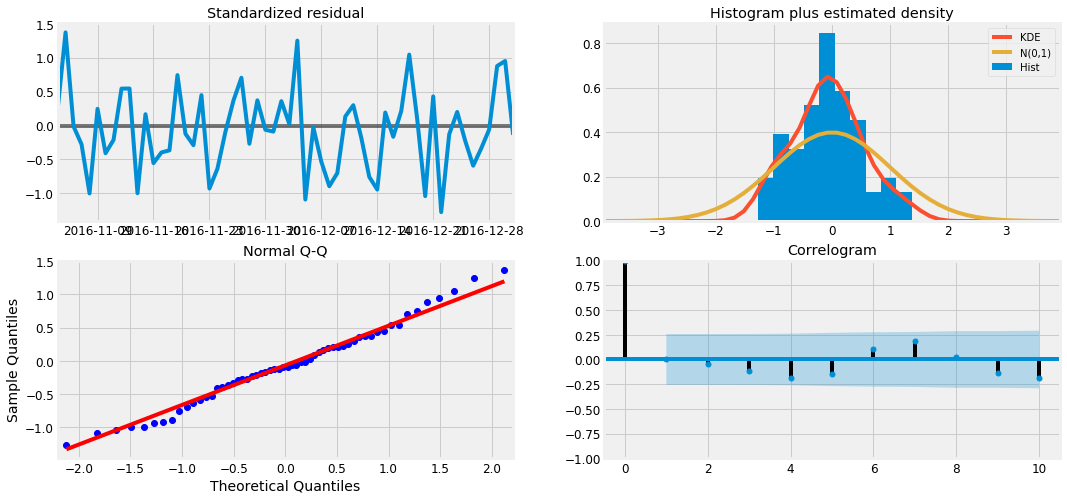

In [23]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

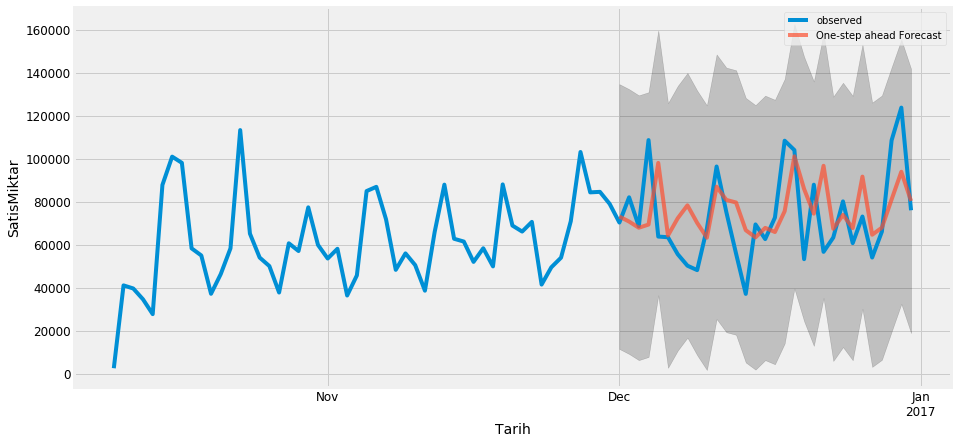

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2016-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016-10-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tarih')
ax.set_ylabel('SatisMiktar')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 395846016.06


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 19895.88
